#  Install package

In [29]:
# ! pip install pyvis
# ! pip install networkx

# Import package

In [30]:
import os
import requests
import networkx as nx
import pandas as pd
import geopandas as gpd
from pyvis.network import Network
import openai
from IPython.display import display, HTML, Code
from IPython.display import clear_output

# Define Solution class
Please run the following cell to define the functions

In [31]:
import LLM_Geo_Constants as constants
import helper

from LLM_Geo_kernel import Solution

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Demonstration Cases

## Input task and data desciption

In [32]:

# Case 1: population living near hazardous wastes

task_name ='Resident_at_risk_counting'

TASK = r"""1) Find out the total population that lives within a tract that contain hazardous waste facilities. The study area is North Carolina, US.
2) Generate a map to show the spatial distribution of population at the tract level and highlight the borders of tracts that have hazardous waste facilities.
"""

DATA_LOCATIONS = ["NC hazardous waste facility ESRI shape file location: https://github.com/gladcolor/LLM- Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip.",
                  "NC tract boundary shapefile location: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip. The tract id column is 'Tract'.",
                  "NC tract population CSV file location: https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv. The population is stored in 'TotalPopulation' column. The tract ID column is 'GEOID'."
                 ]



# # Case 2: France_mobility_changes_2020
# task_name ='France_mobility_changes_2020'
# TASK = r'''
# 1) Show the 2020 human mobility monthly change rates of each administrative regions in a France choropleth map. Each month is a sub-map in a map matrix，12 months in total. All monthly maps need to use the same colorbar range (color scheme: coolwarm). The base of the change rate is January 2020. 
# 2) Draw a line chart to show the monthly change rate trends of all administrative regeions. Each region is a line (the region name is the legend), the x-axis is 2020 months.
# '''

# DATA_LOCATIONS = ["ESRI shapefile for France administrative regions:" + \
#                   "https://github.com/gladcolor/LLM-Geo/raw/master/REST_API/France.zip. " + \
#                   "The 'GID_1' column is the administrative region code, 'NAME_1' column is the administrative region name.",
#                   "REST API url with parameters for daily human mobility data access:" + \
#                   "http://gis.cas.sc.edu/GeoAnalytics/REST?operation=get_daily_movement_for_all_places&source=twitter&scale=world_first_level_admin&begin=01/01/2020&end=12/31/2020." + \
#                   "The response is in CSV format. There are three columns in the response: " + \
#                   "place,date (format:2020-01-07), and intra_movement. 'place' column is the administractive region code of every country;" + \
#                   "codes for France administrative regions start with 'FRA'. Use the total intra_movement of the month as the montly mobility.",
#                  ]

# # Case 3: COVID-19 prevalence trend
# task_name ='COVID_death_rate'
# TASK = r'''1) Draw a map to show the death rate (death/case) of COVID-19 among the countiguous US counties. Use the accumulated COVID-19 data of 2020.12.31 to compute the death rate. Use scheme ='quantiles' when plotting the map.  Set map projection to 'Conus Albers'. Set map size to 15*10 inches.  
# 2) Draw a scatter plot to show the correlation and trend line of the death rate with the senior resident rate, including the r-square and p-value. Set data point transparency to 50%, regression line as red.  Set figure size to 15*10 inches.  
# '''


# DATA_LOCATIONS = [
#                   r"COVID-19 data case in 2020 (county-level): https://github.com/nytimes/covid-19-data/raw/master/us-counties-2020.csv. This data is for daily accumulated COVID cases and deaths for each county in the US. There are 5 columns: date (format: 2021-02-01), county, state, fips, cases, deaths. ",   
#                   r"Contiguous US county boundary (ESRI shapefile): https://github.com/gladcolor/spatial_data/raw/master/contiguous_counties.zip. The county FIPS column is 'GEOID'. ",
#                   r"Census data (ACS2020): https://raw.githubusercontent.com/gladcolor/spatial_data/master/Demography/ACS2020_5year_county.csv. THe needed columns are: 'FIPS', 'Total Population', 'Total Population: 65 to 74 Years', 'Total Population: 75 to 84 Years', 'Total Population: 85 Years and Over'. Drop rows with NaN cells after loading the used columns.",
#                  ]




# # Case 4: Hospital_accessibility
# task_name ='Hospital_accessibility'
# TASK = r'''
# For each zipcode area in South Carolina (SC), calculate the distance from the centroid of the zipcode area to its nearest hospital, and then create a choropleth distance map of zipcode area polygons (unit: km), also show the hospital.
# '''

# DATA_LOCATIONS = [
# r"SC zipcode boundary shapefile: https://github.com/GIBDUSC/test/raw/master/sc_zip_boundary.zip, the map projection is WGS1984.",
# r"SC hospitals:  https://github.com/gladcolor/spatial_data/raw/master/South_Carolina/SC_hospitals_with_emergency_room_cleaned.csv, location columns: longitude in 'POINT_X' column, latitude in 'POINT_Y' column.",          
# ]


## Case 5: Census API
# task_name ='Census_API'
# TASK = r''' Show the spatial distribution of the county level median income in the contigous US. Set figure size to (25,15)
# '''

# DATA_LOCATIONS = [
#       "You can use the Census API.",
# ]


# DATA_LOCATIONS = [
# '''Census API key: ae7be70727932dd6aed257692de3f344365d0678'''              
# ]



save_dir = os.path.join(os.getcwd(), task_name)
os.makedirs(save_dir, exist_ok=True)

# create graph
model=r"gpt-4"
solution = Solution(
                    task=TASK,
                    task_name=task_name,
                    save_dir=save_dir,
                    data_locations=DATA_LOCATIONS,
                    model=model,
                    )
print("Prompt to get solution graph:\n")
print(solution.graph_prompt)

Prompt to get solution graph:

Your role: A professional Geo-information scientist and developer good at Python. 

Your task: Generate a graph (data structure) only, whose nodes are (1) a series of consecutive steps and (2) data to solve this question:  
 1) Find out the total population that lives within a tract that contain hazardous waste facilities. The study area is North Carolina, US.
2) Generate a map to show the spatial distribution of population at the tract level and highlight the borders of tracts that have hazardous waste facilities.
 

Your reply needs to meet these requirements: 
 1. Think step by step.
2. Steps and data (both input and output) form a graph stored in NetworkX. Disconnected components are NOT allowed.
3. Each step is a data process operation: the input can be data paths or variables, and the output can be data paths or variables.
4. There are two types of nodes: a) operation node, and b) data node (both input and output data). These nodes are also input no

## Get graph code from GPT API

In [33]:
response_for_graph = solution.get_LLM_response_for_graph() 
solution.graph_response = response_for_graph
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_graph, language='python'))

import networkx as nx

G = nx.DiGraph()

# Add nodes and edges for the graph

# 1. Load hazardous waste site shapefile
G.add_node("haz_waste_shp_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip", description="Hazardous waste facility shapefile URL")
G.add_node("load_haz_waste_shp", node_type="operation", description="Load hazardous waste facility shapefile")
G.add_edge("haz_waste_shp_url", "load_haz_waste_shp")
G.add_node("haz_waste_gdf", node_type="data", description="Hazardous waste facility GeoDataFrame")
G.add_edge("load_haz_waste_shp", "haz_waste_gdf")

# 2. Load tract boundary shapefile
G.add_node("tract_shp_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip", description="Tract boundary shapefile URL")
G.add_node("load_tract_shp", node_type="operation", description="Load tract boundary shapefile")
G.add_edge("tract_shp_url", "load_tract_shp")
G.add_node("tract_gdf", node_type="data", description="Tract boundary GeoDataFrame")
G.add_edge("load_tract_shp", "tract_gdf")

# 3. Load population CSV file
G.add_node("population_csv_url", node_type="data", data_path="https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv", description="Tract population CSV file URL")
G.add_node("load_population_csv", node_type="operation", description="Load tract population CSV file")
G.add_edge("population_csv_url", "load_population_csv")
G.add_node("population_df", node_type="data", description="Population DataFrame")
G.add_edge("load_population_csv", "population_df")

# 4. Join population to tract boundary
G.add_node("join_population_to_tract", node_type="operation", description="Join population data to tract boundary using GEOID")
G.add_edge("population_df", "join_population_to_tract")
G.add_edge("tract_gdf", "join_population_to_tract")
G.add_node("tract_with_pop_gdf", node_type="data", description="Tract boundary GeoDataFrame with population")
G.add_edge("join_population_to_tract", "tract_with_pop_gdf")

# 5. Perform spatial join between tract and waste sites
G.add_node("spatial_join", node_type="operation", description="Spatial join between tract boundaries and hazardous waste sites")
G.add_edge("tract_with_pop_gdf", "spatial_join")
G.add_edge("haz_waste_gdf", "spatial_join")
G.add_node("tract_with_waste_and_pop_gdf", node_type="data", description="Tract boundary GeoDataFrame with population and waste sites")
G.add_edge("spatial_join", "tract_with_waste_and_pop_gdf")

# 6. Calculate total population in tracts with waste facilities
G.add_node("calculate_total_pop", node_type="operation", description="Calculate total population living in tracts with waste facilities")
G.add_edge("tract_with_waste_and_pop_gdf", "calculate_total_pop")
G.add_node("total_pop_in_waste_tracts", node_type="data", description="Total population in tracts with waste facilities")
G.add_edge("calculate_total_pop", "total_pop_in_waste_tracts")

# Save the graph into GraphML format
nx.write_graphml(G, "E:\Research\LLM-Geo\Resident_at_risk_counting\Resident_at_risk_counting.graphml")

## Execute code to generate the solution graph

In [34]:
exec(solution.code_for_graph)
solution_graph = solution.load_graph_file()

# Show the graph
G = nx.read_graphml(solution.graph_file)  
nt = helper.show_graph(G)
html_name = os.path.join(os.getcwd(), solution.task_name + '.html')  
# HTML file should in the same directory. See:
# https://stackoverflow.com/questions/65564916/error-displaying-pyvis-html-inside-jupyter-lab-cell
nt.show(name=html_name)
# html_name

E:\Research\LLM-Geo\Resident_at_risk_counting.html


## Generate prompts and code for operations (functions)

In [35]:
operations = solution.get_LLM_responses_for_operations(review=True)
solution.save_solution()

all_operation_code_str = '\n'.join([operation['operation_code'] for operation in operations])

clear_output(wait=True)
display(Code(all_operation_code_str, language='python'))

import geopandas as gpd

def load_haz_waste_shp(haz_waste_shp_url='https://github.com/gladcolor/LLM- Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip'):
    """
    Load hazardous waste facility shapefile 

    Args:
    haz_waste_shp_url (str): A string containing the URL to the hazardous waste facility shapefile.

    Returns:
    haz_waste_gdf (geopandas.GeoDataFrame): A GeoPandas DataFrame that contains the data from the hazardous waste facility shapefile.
    """
    
    haz_waste_gdf = gpd.read_file(haz_waste_shp_url)
    return haz_waste_gdf
def load_tract_shp(tract_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip'):
    """
    Description:
        Load a tract boundary shapefile using the GeoPandas read_file method. 
        If the geodataframe isn't in the EPSG:4326 projection, it is converted to it.

    Args:
        tract_shp_url (str): URL to a zipped tract boundary shapefile.

    Returns:
        tract_gdf (GeoDataFrame): A GeoDataFrame containing the content of the tract boundary shapefile.
    """
    import geopandas as gpd

    # load GeoDataFrame from shapefile URL
    tract_gdf = gpd.read_file(tract_shp_url)

    # if GeoDataFrame not in EPSG:4326, convert it
    if tract_gdf.crs != 'EPSG:4326':
        tract_gdf = tract_gdf.to_crs('EPSG:4326')

    return tract_gdf
import pandas as pd

def load_population_csv(population_csv_url='https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv'):
    """
    Load a CSV file from a given URL into a pandas DataFrame. 
    
    Input: 
    population_csv_url: string. A given URL link directs to the CSV file that to be loaded.

    Output: 
    population_df: pandas DataFrame. Loaded DataFrame from the CSV file.
    """
    # Load CSV file from URL using pandas
    population_df = pd.read_csv(population_csv_url, dtype={'GEOID': str})

    # Return the DataFrame
    return population_df
def join_population_to_tract(tract_gdf, population_df):
    """
    Description: Join population data to tract boundary using GEOID. 
    
    Args:
        tract_gdf: GeoDataFrame from loaded tract boundaries.
        population_df: DataFrame from loaded CSV file containing population data.
        
    Returns:
        tract_with_pop_gdf: A GeoDataFrame of tract boundaries with associated population data.
    """
    # Ensure the GEOID of tract_gdf and population_df are of the same type
    tract_gdf['GEOID'] = tract_gdf['GEOID'].astype(str)
    population_df['GEOID'] = population_df['GEOID'].astype(str)

    # Merge tract_gdf and population_df on GEOIDs
    tract_with_pop_gdf = pd.merge(tract_gdf, population_df, on='GEOID')

    return tract_with_pop_gdf
import geopandas as gpd

def spatial_join(haz_waste_gdf, tract_with_pop_gdf):
    """
    Spatial join between tract boundaries and hazardous waste sites.
    
    Args:
    haz_waste_gdf (geopandas.GeoDataFrame): A GeoDataFrame that contains the data from the hazardous waste facilities shapefile.
    tract_with_pop_gdf (geopandas.GeoDataFrame): A GeoDataFrame that contains the data from the tract boundaries shapefile with joined population data.

    Returns:
    tract_with_waste_and_pop_gdf (geopandas.GeoDataFrame): A GeoDataFrame that contains the data from the tract boundaries, 
    joined with both hazardous waste facilities data and population data.
    """

    # Check the crs and set both GeoDataFrames to the same crs if different
    if haz_waste_gdf.crs != tract_with_pop_gdf.crs:
         haz_waste_gdf = haz_waste_gdf.to_crs(tract_with_pop_gdf.crs)
            
    # Perform spatial join
    tract_with_waste_and_pop_gdf = gpd.sjoin(tract_with_pop_gdf, haz_waste_gdf, how='inner')
    
    # Remove duplicates
    tract_with_waste_and_pop_gdf.drop_duplicates(subset=['Tract'], keep='first', inplace=True)
   
    return tract_with_waste_and_pop_gdf
def calculate_total_pop(tract_with_waste_and_pop_gdf):
    """
    Description: Calculate total po

## Generate prompts and code for assembly program

In [36]:
assembly_LLM_response = solution.get_LLM_assembly_response(review=True)
solution.assembly_LLM_response = assembly_LLM_response
solution.save_solution()

clear_output(wait=True)
display(Code(solution.code_for_assembly, language='python'))

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import contextily as ctx


def load_haz_waste_shp(haz_waste_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/Hazardous_Waste_Sites.zip'):
    haz_waste_gdf = gpd.read_file(haz_waste_shp_url)
    return haz_waste_gdf


def load_tract_shp(tract_shp_url='https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/tract_shp_37.zip'):
    tract_gdf = gpd.read_file(tract_shp_url)

    # Ensure that geodataframe uses WGS84 coordinate system
    if tract_gdf.crs != 'EPSG:4326':
        tract_gdf = tract_gdf.to_crs('EPSG:4326')
    
    return tract_gdf


def load_population_csv(population_csv_url='https://github.com/gladcolor/LLM-Geo/raw/master/overlay_analysis/NC_tract_population.csv'):
    population_df = pd.read_csv(population_csv_url, dtype={'Tract': str})
    return population_df


def join_population_to_tract(tract_gdf, population_df):
    # Perform data type adjustments for consistent joining
    tract_gdf['GEOID'] = tract_gdf['GEOID'].astype(str)
    population_df['GEOID'] = population_df['GEOID'].astype(str)

    # Perform join operation
    tract_with_pop_gdf = tract_gdf.merge(population_df, left_on='GEOID', right_on='GEOID')

    return tract_with_pop_gdf


def spatial_join(haz_waste_gdf, tract_with_pop_gdf):
    # Ensure that both geodataframes have the same CRS
    if haz_waste_gdf.crs != tract_with_pop_gdf.crs:
        haz_waste_gdf = haz_waste_gdf.to_crs(tract_with_pop_gdf.crs)
        
    # Perform spatial join operation
    tract_with_waste_and_pop_gdf = gpd.sjoin(tract_with_pop_gdf, haz_waste_gdf, how="inner")

    return tract_with_waste_and_pop_gdf.reset_index(drop=True)
   

def calculate_total_pop(tract_with_waste_and_pop_gdf):
    total_pop_in_waste_tracts = tract_with_waste_and_pop_gdf['TotalPopulation'].sum()
    return total_pop_in_waste_tracts 


def plot_map(tract_with_waste_and_pop_gdf, tract_with_pop_gdf):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))

    tract_with_pop_gdf = tract_with_pop_gdf.to_crs(epsg=3857)
    tract_with_waste_and_pop_gdf = tract_with_waste_and_pop_gdf.to_crs(epsg=3857)

    tract_with_pop_gdf.plot(column='TotalPopulation', cmap='RdYlBu', linewidth=0.8, ax=ax, legend=True, alpha=0.5)
    tract_with_waste_and_pop_gdf.boundary.plot(linewidth=1.5, ax=ax, color='black')
    ctx.add_basemap(ax)
    plt.title("Spatial distribution of population and waste facilities")
    plt.savefig('population_distribution_map.png')
    plt.show()


def assembely_solution():
    # load data
    haz_waste_gdf = load_haz_waste_shp()
    tract_gdf = load_tract_shp()
    population_df = load_population_csv()

    # process data
    tract_with_pop_gdf = join_population_to_tract(tract_gdf, population_df)
    tract_with_waste_and_pop_gdf = spatial_join(haz_waste_gdf, tract_with_pop_gdf)
    total_population = calculate_total_pop(tract_with_waste_and_pop_gdf)

    # generate outputs
    plot_map(tract_with_waste_and_pop_gdf, tract_with_pop_gdf)

    return total_population

   
assembely_solution()

## Execute assembly code



-------------- Running code (trial # 1/10) --------------


Error_info_str: 
Traceback (most recent call last):
  File "Complete program", line 199, in <module>
    assembely_solution()
  File "Complete program", line 189, in assembely_solution
    tract_with_pop_gdf = join_population_to_tract(tract_gdf, population_df)
  File "Complete program", line 143, in join_population_to_tract
    tract_gdf['GEOID'] = tract_gdf['GEOID'].astype(str)
  File "e:\ProgramData\Anaconda3\envs\street_mapping_env\lib\site-packages\geopandas\geodataframe.py", line 1415, in __getitem__
    result = super().__getitem__(key)
  File "e:\ProgramData\Anaconda3\envs\street_mapping_env\lib\site-packages\pandas\core\frame.py", line 3805, in __getitem__
    indexer = self.columns.get_loc(key)
  File "e:\ProgramData\Anaconda3\envs\street_mapping_env\lib\site-packages\pandas\core\indexes\base.py", line 3805, in get_loc
    raise KeyError(key) from err
KeyError: 'GEOID'

Sending error information to LLM for debugging

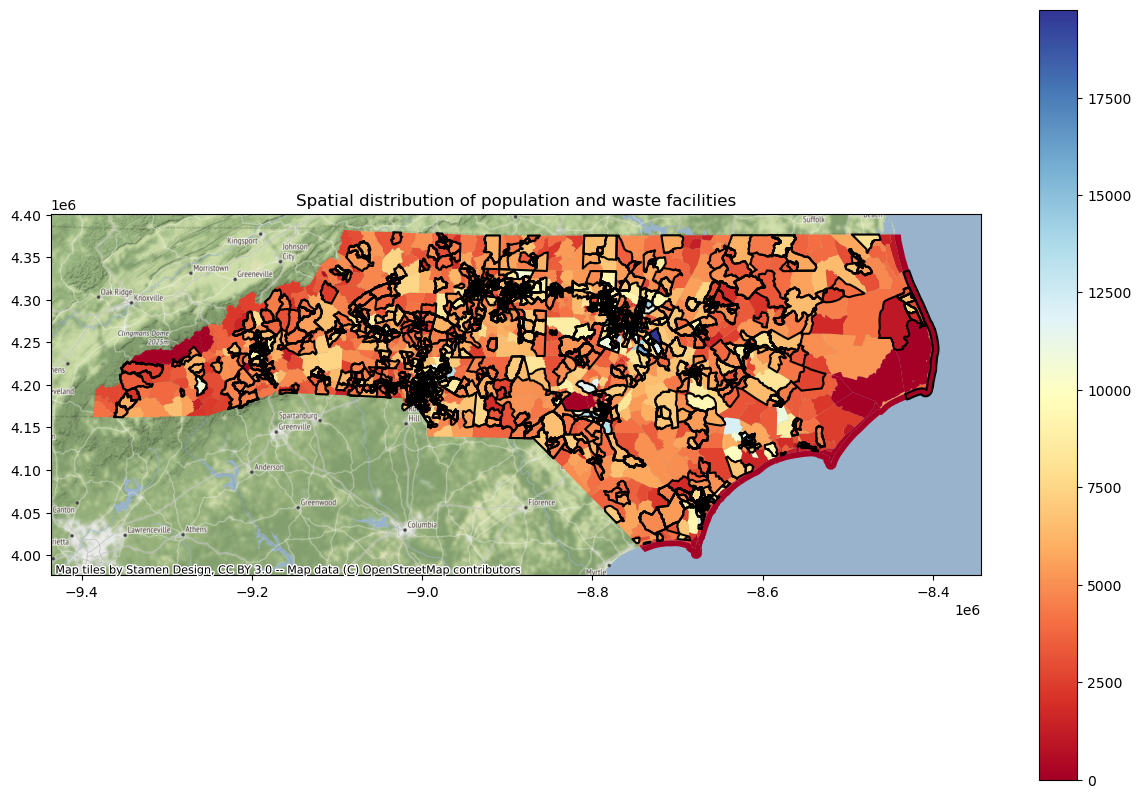



--------------- Done ---------------




In [37]:
all_code = all_operation_code_str + '\n' + solution.code_for_assembly

# display(Code(all_code, language='python'))

all_code = solution.execute_complete_program(code=all_code, try_cnt=10)